In [1]:
!pip install opencv-python # OpenCV 라이브러리 설치

import cv2 # OpenCV 라이브러리 import
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


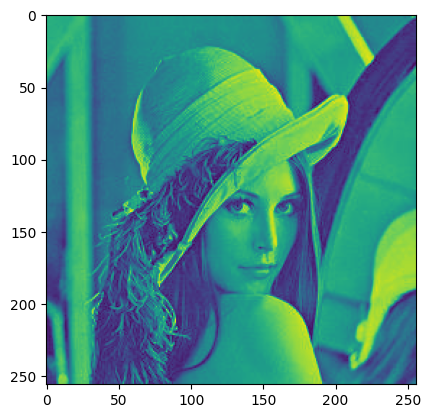

In [3]:

img = cv2.imread('/content/gdrive/My Drive/Images/lena256.jpg') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1)

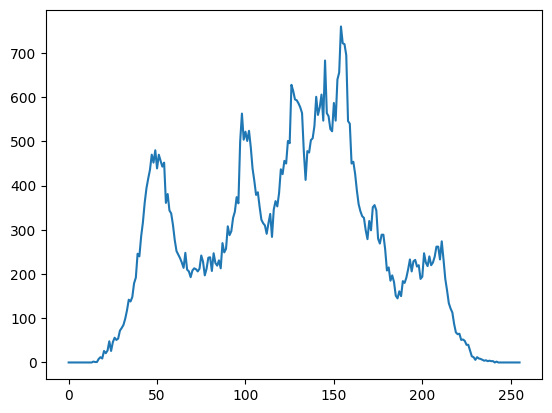

In [5]:
hist = cv2.calcHist([gimg1],[0], None, [256] , [0,255])
plt.plot(hist)

(256, 256)


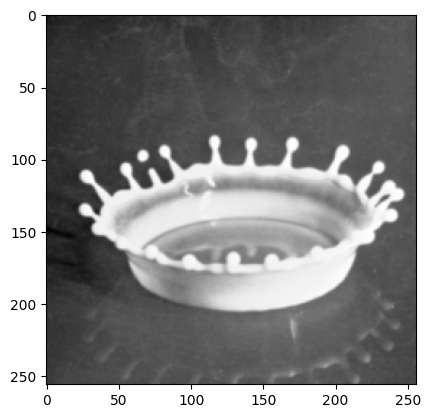

In [33]:
#img = cv2.imread('/content/gdrive/My Drive/Images/cell.bmp')
#img = cv2.imread('/content/gdrive/My Drive/Images/rice.bmp')
img = cv2.imread('/content/gdrive/My Drive/Images/milkdrop.bmp')
#img = cv2.imread('/content/gdrive/My Drive/Images/cell-bright.bmp') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1,cmap='gray')

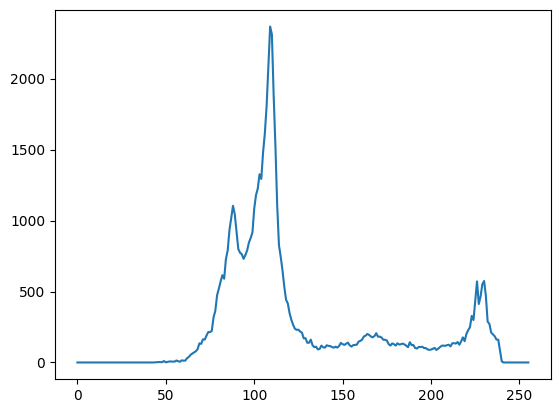

In [41]:
hist = cv2.calcHist([gimg1],[0], None, [256] , [0,255])
plt.plot(hist)

In [50]:
gBin = np.zeros((gimg1.shape[0],gimg1.shape[1]))

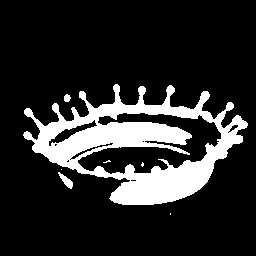

In [43]:
T =180

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if(gimg1[h,w] > T):
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0
#plt.imshow(gBin, cmap = 'gray')
cv2_imshow(gBin)

In [51]:
T1 = 50
T2 =0
T0 = 1
outimg = np.zeros((gimg1.shape[0],gimg1.shape[1]))

In [53]:
def threshold_update(h, w, img, output , T1): # output을 함수 인자로 추가
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1 # count2 변수 초기화

  for h in range(img.shape[0]):
    for w  in range (img.shape[1]):
      if(output[h,w] == 255):
        sum1 = sum1 +img[h,w]
        count1 = count1 + 1
      else:
        sum2 = sum2 + img[h,w]
        count2 = count2 +1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T2 = np.int32(avg1 + avg2)/2
  return T2

In [46]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if(gimg1[h,w] > T1):
      outimg[h,w] = 255
    else:
      outimg[h,w] = 0


In [62]:
while True :
  T2 = threshold_update(gimg1.shape[0] , gimg1.shape[1], gimg1, outimg , T1)


  if(np.abs(T2-T1) < T0):
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if(gimg1[h,w] > T2):
          outimg[h,w] = 255
        else:
          outimg[h,w] = 0
    break
  else:
    T1 = T2
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if(gimg1[h,w] > T2):
          outimg[h,w] = 255
      else:
          outimg[h,w] = 0





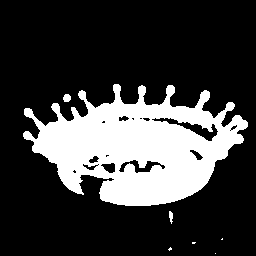

150.0


In [63]:
cv2_imshow(outimg)
print(T2)